In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## Process file books.csv 

In [2]:
#read data from file books.csv
book = pd.read_csv("Data/books.csv")
book.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
#general information
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [4]:
text = book["title"]
text

0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
                               ...                        
11122     Expelled from Eden: A William T. Vollmann Reader
11123                          You Bright and Risen Angels
11124                      The Ice-Shirt (Seven Dreams #1)
11125                                          Poor People
11126                          Las aventuras de Tom Sawyer
Name: title, Length: 11127, dtype: object

In [5]:
convert_text = " ".join(text).lower().split()
convert_text

['harry',
 'potter',
 'and',
 'the',
 'half-blood',
 'prince',
 '(harry',
 'potter',
 '#6)',
 'harry',
 'potter',
 'and',
 'the',
 'order',
 'of',
 'the',
 'phoenix',
 '(harry',
 'potter',
 '#5)',
 'harry',
 'potter',
 'and',
 'the',
 'chamber',
 'of',
 'secrets',
 '(harry',
 'potter',
 '#2)',
 'harry',
 'potter',
 'and',
 'the',
 'prisoner',
 'of',
 'azkaban',
 '(harry',
 'potter',
 '#3)',
 'harry',
 'potter',
 'boxed',
 'set',
 'books',
 '1-5',
 '(harry',
 'potter',
 '#1-5)',
 'unauthorized',
 'harry',
 'potter',
 'book',
 'seven',
 'news:',
 '"half-blood',
 'prince"',
 'analysis',
 'and',
 'speculation',
 'harry',
 'potter',
 'collection',
 '(harry',
 'potter',
 '#1-6)',
 'the',
 'ultimate',
 "hitchhiker's",
 'guide:',
 'five',
 'complete',
 'novels',
 'and',
 'one',
 'story',
 "(hitchhiker's",
 'guide',
 'to',
 'the',
 'galaxy',
 '#1-5)',
 'the',
 'ultimate',
 "hitchhiker's",
 'guide',
 'to',
 'the',
 'galaxy',
 "(hitchhiker's",
 'guide',
 'to',
 'the',
 'galaxy',
 '#1-5)',
 'the',

In [6]:
stopword = ['One','Day','de','Three','La','Last','New']
stopwords = set(STOPWORDS).union(set(stopword))
words = [word for word in convert_text if word not in stopwords]
words

['harry',
 'potter',
 'half-blood',
 'prince',
 '(harry',
 'potter',
 '#6)',
 'harry',
 'potter',
 'order',
 'phoenix',
 '(harry',
 'potter',
 '#5)',
 'harry',
 'potter',
 'chamber',
 'secrets',
 '(harry',
 'potter',
 '#2)',
 'harry',
 'potter',
 'prisoner',
 'azkaban',
 '(harry',
 'potter',
 '#3)',
 'harry',
 'potter',
 'boxed',
 'set',
 'books',
 '1-5',
 '(harry',
 'potter',
 '#1-5)',
 'unauthorized',
 'harry',
 'potter',
 'book',
 'seven',
 'news:',
 '"half-blood',
 'prince"',
 'analysis',
 'speculation',
 'harry',
 'potter',
 'collection',
 '(harry',
 'potter',
 '#1-6)',
 'ultimate',
 "hitchhiker's",
 'guide:',
 'five',
 'complete',
 'novels',
 'one',
 'story',
 "(hitchhiker's",
 'guide',
 'galaxy',
 '#1-5)',
 'ultimate',
 "hitchhiker's",
 'guide',
 'galaxy',
 "(hitchhiker's",
 'guide',
 'galaxy',
 '#1-5)',
 "hitchhiker's",
 'guide',
 'galaxy',
 "(hitchhiker's",
 'guide',
 'galaxy',
 '#1)',
 "hitchhiker's",
 'guide',
 'galaxy',
 "(hitchhiker's",
 'guide',
 'galaxy',
 '#1)',
 'ultim

In [7]:
#join text to string
string = " ".join(words).strip()
string

'harry potter half-blood prince (harry potter #6) harry potter order phoenix (harry potter #5) harry potter chamber secrets (harry potter #2) harry potter prisoner azkaban (harry potter #3) harry potter boxed set books 1-5 (harry potter #1-5) unauthorized harry potter book seven news: "half-blood prince" analysis speculation harry potter collection (harry potter #1-6) ultimate hitchhiker\'s guide: five complete novels one story (hitchhiker\'s guide galaxy #1-5) ultimate hitchhiker\'s guide galaxy (hitchhiker\'s guide galaxy #1-5) hitchhiker\'s guide galaxy (hitchhiker\'s guide galaxy #1) hitchhiker\'s guide galaxy (hitchhiker\'s guide galaxy #1) ultimate hitchhiker\'s guide (hitchhiker\'s guide galaxy #1-5) short history nearly everything bill bryson\'s african diary bryson\'s dictionary troublesome words: writer\'s guide getting right sunburned country stranger myself: notes returning america twenty years away lost continent: travels small town america neither there: travels europe no

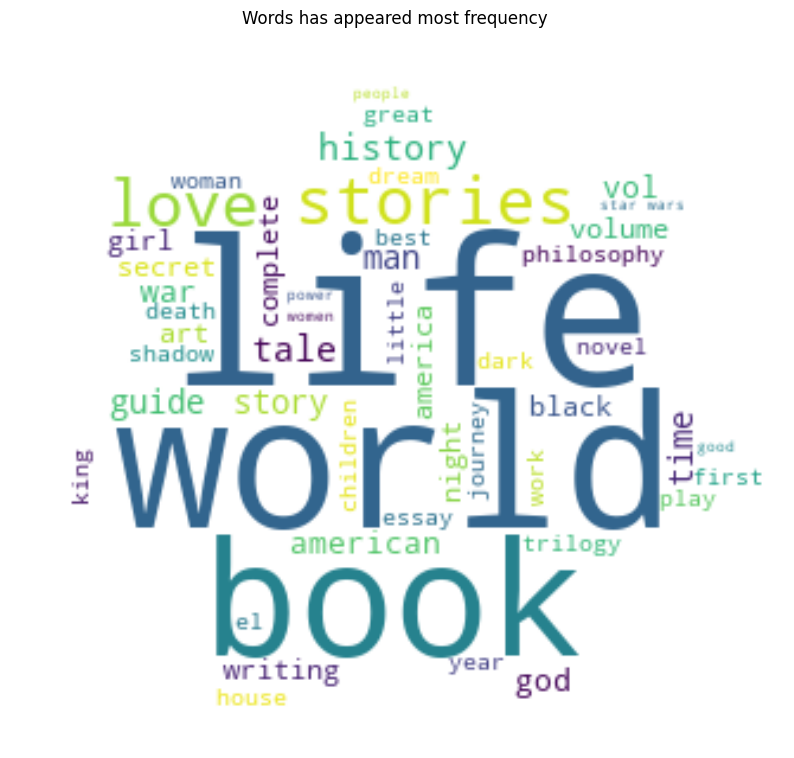

In [8]:
#create mask
wc_mask = np.array(Image.open("Data/hinh.png"))

#create wordcloud
wc = WordCloud(background_color="white", max_words=50,mask=wc_mask,stopwords=stopwords).generate(string)

#config wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title("Words has appeared most frequency ")
plt.show()

## Process Laptops_train.csv file

In [9]:
laptop = pd.read_csv("Data/laptops_train.csv")
laptop.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,Cpu,Ram,Storage,Gpu,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [10]:
laptop.tail()

,Manufacturer,Model Name,Category,Screen Size,Screen,Cpu,Ram,Storage,Gpu,Operating System,Operating System Version,Weight,Price
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.0
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.0
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.8
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.0
976,Lenovo,ThinkPad T460,Notebook,"14.0""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,508GB Hybrid,Intel HD Graphics 520,Windows,7,1.70kg,8909784.0


In [11]:
#general information
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   Cpu                       977 non-null    object 
 6   Ram                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   Gpu                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [12]:
#general information of numeric columns
laptop.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


In [13]:
#Checking data has null or not null
laptop.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
Cpu                           0
Ram                           0
Storage                       0
Gpu                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [14]:
#check duplicated on columns
laptop.duplicated().sum()

np.int64(0)

In [15]:
#drop Operating system version columne which has 136 null values 
laptop.drop("Operating System Version", axis=1, inplace=True)
laptop

,Manufacturer,Model Name,Category,Screen Size,Screen,Cpu,Ram,Storage,Gpu,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42kg,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,1.95kg,10492560.00
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73kg,18227710.80
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04kg,8705268.00


In [16]:
#change columns: Ram, Screen Size, Weight to float
laptop["Ram"] = laptop["Ram"].str.replace("GB","").astype(float)
laptop["Screen Size"] = laptop["Screen Size"].str.replace('"','').astype(float)
laptop["Weight"] = laptop["Weight"].str.replace("kg","").astype(float)
laptop

,Manufacturer,Model Name,Category,Screen Size,Screen,Cpu,Ram,Storage,Gpu,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560.00
974,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.80
975,HP,Probook 450,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268.00


In [17]:
laptop['Cpu manufactures'] = laptop['Cpu'].str.split().str[0]
laptop

,Manufacturer,Model Name,Category,Screen Size,Screen,Cpu,Ram,Storage,Gpu,Operating System,Weight,Price,Cpu manufactures
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600.00,Intel
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560.00,Intel
974,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.80,Intel
975,HP,Probook 450,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268.00,Intel


In [18]:
laptop["Screen Type"] = laptop["Screen"].apply(lambda x: "Touchscreen" if "Touchscreen" in x else "Not Touchscreen")
laptop

,Manufacturer,Model Name,Category,Screen Size,Screen,Cpu,Ram,Storage,Gpu,Operating System,Weight,Price,Cpu manufactures,Screen Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,Intel,Not Touchscreen
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,Intel,Not Touchscreen
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00,Intel,Not Touchscreen
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40,Intel,Not Touchscreen
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,Intel,Not Touchscreen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,24897600.00,Intel,Not Touchscreen
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows,1.95,10492560.00,Intel,Not Touchscreen
974,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.73,18227710.80,Intel,Not Touchscreen
975,HP,Probook 450,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,2.04,8705268.00,Intel,Not Touchscreen


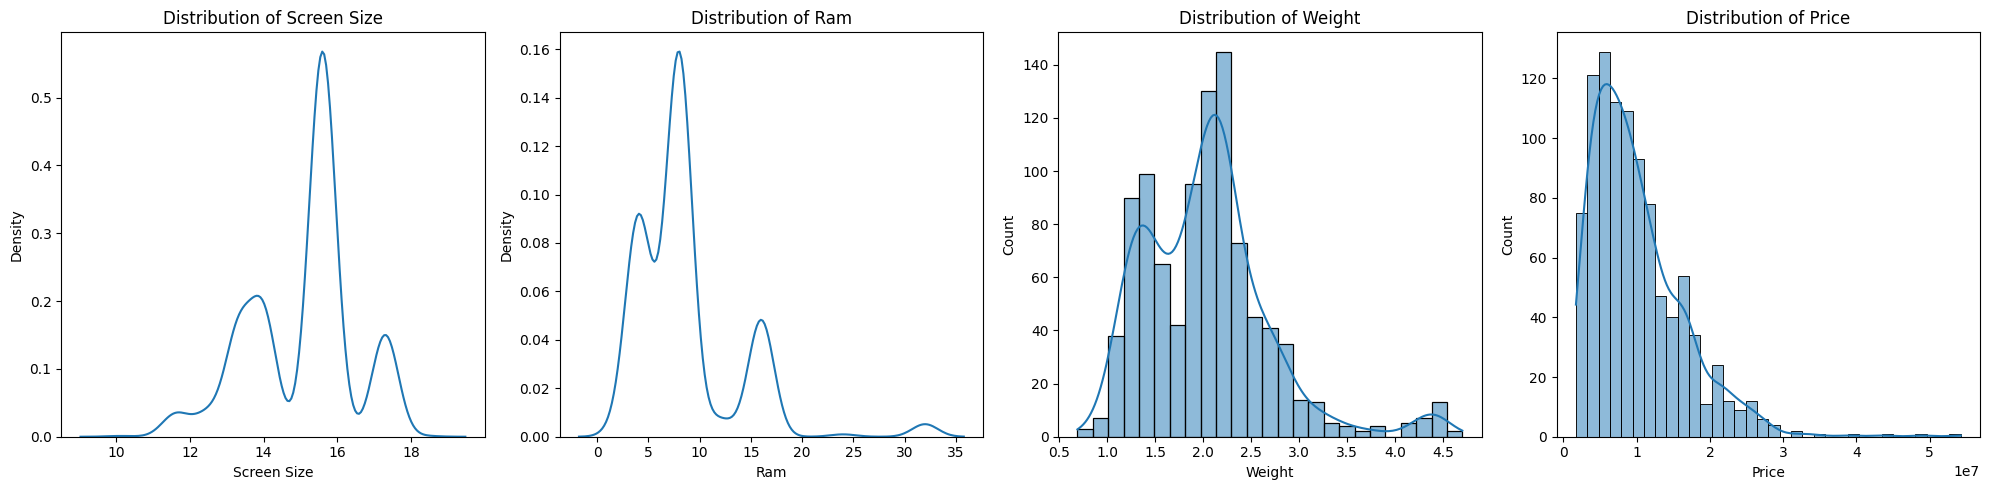

In [22]:
fig,ax = plt.subplots(1,4,figsize = (20,5))

sns.kdeplot(data=laptop, x = "Screen Size",ax=ax[0])
ax[0].set_title('Distribution of Screen Size')

sns.kdeplot(data=laptop,x="Ram", ax=ax[1])
ax[1].set_title('Distribution of Ram')

sns.histplot(data=laptop,x= "Weight", kde="True", ax=ax[2])
ax[2].set_title('Distribution of Weight')

sns.histplot(data=laptop,x = "Price", kde="True", ax=ax[3])
ax[3].set_title("Distribution of Price")

plt.tight_layout()
plt.show()

#### General evaluation
1. The 16-inch screen size is the most common.
2. Regarding RAM, sizes below 10GB are the most produced, and there are also some in the range of 20 to 30GB.
3. The weight of laptops is generally in the range of 1 to 3 kg, with some weighing below 1 kg.
4. The price is not too high, with most being below 30,000,000 VND.
5. Screen size in the range of 12 to 18 inch would have RAM in the range of 5 to 20GB


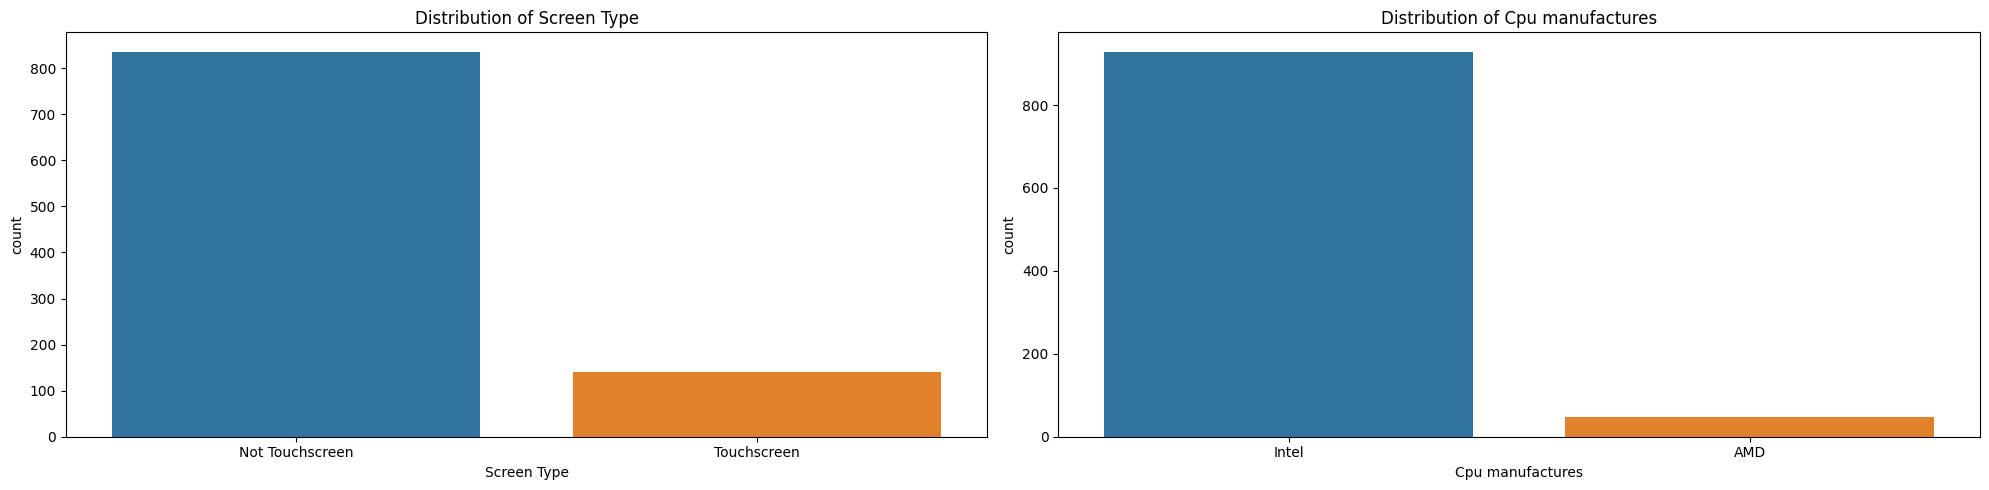

In [24]:
#subplot: single plot in a grid
#subplots: mutiple at once
fig,axes = plt.subplots(1,2,figsize = (20,5))

sns.countplot(laptop,x="Screen Type", hue = "Screen Type", ax = axes[0])
axes[0].set_title("Distribution of Screen Type")

sns.countplot(laptop, x = "Cpu manufactures", hue = "Cpu manufactures", ax = axes[1])
axes[1].set_title("Distribution of Cpu manufactures")

plt.tight_layout()
plt.show()

#### General evaluation
1. Not TouchScreen has been produced more than Touchsreen
2. Intel is the main manufactures
3. From 2 graphs, we can know that Intel CPU is aim to Not Touchscreen more than Touchscreen

In [30]:
fig = px.pie(laptop,names = "Operating System", hover_data="Manufacturer")
fig.show()

#### Evaluation
1. The pie chart shows that Windows is the most used operating system, and Acer is the manufacturer that uses this system the most for their laptops.
2. Android is the least used operating system.

In [32]:
#Show top 10 manufactures who has the lowest prices
top_10 = laptop.groupby("Manufacturer")["Price"].mean().reset_index().sort_values(by = "Price", ascending=False).head(10)
top_10

,Manufacturer,Price
14,Razer,3.360287e+07
9,LG,1.866431e+07
11,MSI,1.591444e+07
6,Google,1.491781e+07
1,Apple,1.472263e+07
13,Microsoft,1.433665e+07
15,Samsung,1.340691e+07
8,Huawei,1.266221e+07
4,Dell,1.106754e+07
16,Toshiba,1.091755e+07


Text(0.5, 1.0, 'Top 10 Manufacturers have the lowest price')

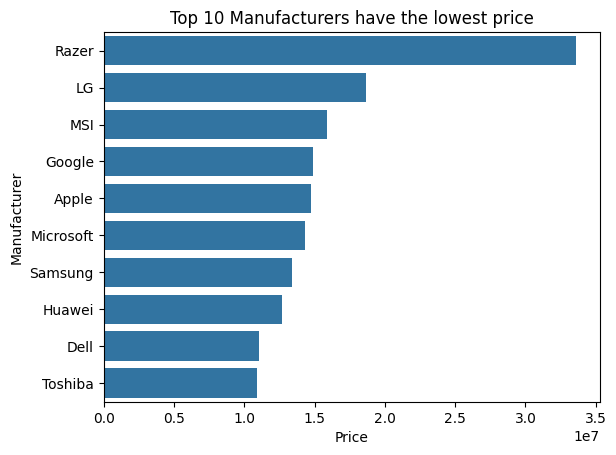

In [34]:
sns.barplot(data=top_10, x = "Price", y = "Manufacturer", errorbar=None)
plt.title("Top 10 Manufacturers have the lowest price")

#### Evaluation
1. Razer is the manufacturer with the highest average selling price. 
2. Toshiba is the manufacturer with the lowest selling price in the top 10

In [37]:
max_price_per_manufacturer = laptop.groupby("Manufacturer", as_index=False)["Price"].max()
fig = px.treemap(max_price_per_manufacturer,path=["Manufacturer"], values="Price")
fig.show()

#### Evaluation

1. When finding the maximum price at which a manufacturer can sell a laptop, the treemap shows that Razer sells laptops at the highest price, followed by Lenovo and HP. The prices range from 39 to 53 million VND.
2. Vero and Mediacom are the manufacturers with the lowest prices, ranging from 2 to 3 million VND, which is approximately 13 times cheaper than the others.